In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [12]:
df_train=pd.read_csv('mnist_train.csv')
df_test=pd.read_csv('mnist_test.csv')
df_train=df_train.to_numpy()
df_test=df_test.to_numpy()
X=df_train[:,1:]
y=df_train[:,0]
X=X/255
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2)
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_val=le.fit_transform(y_val)
y_train=to_categorical(y_train,10)
y_val=to_categorical(y_val,10)

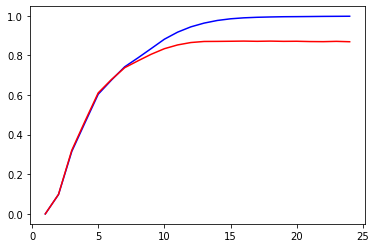

In [13]:
train_scores = []
Validation_scores = []
for d in range(1, 25):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    Validation_scores.append(clf.score(X_val, y_val))

plt.plot(np.arange(1, 25, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 25, 1), np.array(Validation_scores), 'r-')

In [14]:
X_test=df_test[:,1:]
y_test=df_test[:,0]
X_test=X_test/255  
y_test=le.fit_transform(y_test)
y_test=to_categorical(y_test,10)

In [15]:
clf = DecisionTreeClassifier(max_depth=14)
clf.fit(X_train, y_train)
print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('Validation accuracy : ', clf.score(X_val, y_val))
print('test accuracy : ', clf.score(X_test, y_test))

max depth :  14
train accuracy :  0.9759791666666666
Validation accuracy :  0.8661666666666666
test accuracy :  0.8744
